In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import pyart


## You are using the Python ARM Radar Toolkit (Py-ART), an open source
## library for working with weather radar data. Py-ART is partly
## supported by the U.S. Department of Energy as part of the Atmospheric
## Radiation Measurement (ARM) Climate Research Facility, an Office of
## Science user facility.
##
## If you use this software to prepare a publication, please cite:
##
##     JJ Helmus and SM Collis, JORS 2016, doi: 10.5334/jors.119



In [2]:
fpath = '/Volumes/Neely/PestDAR/Indian_Raw_Radar_Data/DLI191215000229.RAWF1M2'

In [3]:
f = wrl.util.get_wradlib_data_file(fpath)

In [5]:
fcontent = wrl.io.read_iris(f)

In [8]:
fcontent.keys()

odict_keys(['product_hdr', 'product_type', 'ingest_header', 'nsweeps', 'nrays', 'nbins', 'data_types', 'data', 'raw_product_bhdrs'])

In [2]:
#print(fcontent['data'][1])

In [6]:
radar=pyart.io.read_sigmet(fpath)

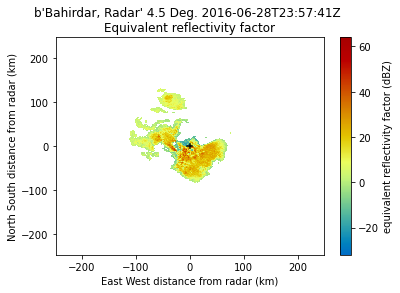

In [21]:
display = pyart.graph.RadarDisplay(radar)
fig = plt.figure()
ax = fig.add_subplot(111)
display.plot('reflectivity', 0, vmin=-32, vmax=64.)
#display.plot_range_rings([10, 20, 30, 40])
display.plot_cross_hair(5.)
plt.show()

In [24]:
radar.latitude

{'long_name': 'Latitude',
 'standard_name': 'Latitude',
 'units': 'degrees_north',
 'data': array([12.00234002])}

In [25]:
radar.longitude

{'long_name': 'Longitude',
 'standard_name': 'Longitude',
 'units': 'degrees_east',
 'data': array([36.91707999])}

/Users/rrniii/anaconda3/envs/pestdar/lib/python3.7/site-packages/pyart/graph/radarmapdisplay.py:507: DeprecationWarning: The outline_patch property is deprecated. Use GeoAxes.spines['geo'] or the default Axes properties instead.
  ax.outline_patch.get_path().vertices.tolist())
/Users/rrniii/anaconda3/envs/pestdar/lib/python3.7/site-packages/pyart/graph/radarmapdisplay.py:507: DeprecationWarning: The outline_patch property is deprecated. Use GeoAxes.spines['geo'] or the default Axes properties instead.
  ax.outline_patch.get_path().vertices.tolist())


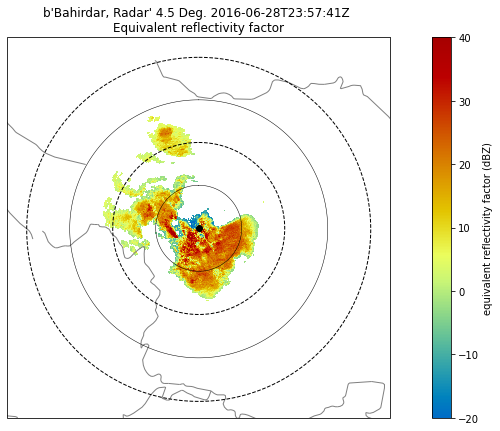

In [57]:
display = pyart.graph.RadarMapDisplay(radar)

fig = plt.figure(figsize=[15, 7])

# Setting projection and ploting the second tilt
projection = ccrs.LambertConformal(central_latitude=radar.latitude['data'][0],
                                   central_longitude=radar.longitude['data'][0])
x=1

display.plot_ppi_map('reflectivity', 0, vmin=-20, vmax=40,
                     min_lon=radar.longitude['data'][0]-2*x, max_lon=radar.longitude['data'][0]+2*x, min_lat=radar.latitude['data'][0]-2*x, max_lat=radar.latitude['data'][0]+2*x,
                     lon_lines=np.arange(-158, -154, .2), resolution='10m',
                     lat_lines=np.arange(69, 72, .1), projection=projection,
                     fig=fig, lat_0=radar.latitude['data'][0],
                     lon_0=radar.longitude['data'][0])

# Plot range rings at 10, 20, 30, 40km
display.plot_range_ring(50., line_style='k-',lw=0.5)
display.plot_range_ring(100., line_style='k--',lw=1)
display.plot_range_ring(150., line_style='k-',lw=0.5)
display.plot_range_ring(200., line_style='k--',lw=1)


# Indicate the radar location with a point
display.plot_point(radar.longitude['data'][0], radar.latitude['data'][0],'ko')

plt.show()